### Проект 2 [Цена дома]

Вам предоставляется набор данных, содержащий информацию о домах и **ценах**. Набор данных уже разделен на ```train.csv``` и ```test.csv```. Файл ```data_description.txt``` содержит описание столбцов.

**Цель:** построить модели для прогнозирования цен на дома.

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.

**Примечание:** вам **рекомендуется** искать другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле test.csv.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_orig = pd.read_csv("train.csv")

In [3]:
train_orig.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
1,366,70,RM,59.0,10690,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
2,883,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,178000
3,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
4,1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000


In [4]:
train = train_orig.copy()

In [5]:
test_orig = pd.read_csv("test.csv")

In [6]:
test_orig.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000
1,932,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,117500
2,647,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,98300
3,547,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,210000
4,812,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,ConLD,Normal,144500


In [7]:
test = test_orig.copy()

## 1. Очистка, предварительная обработка данных

Как можно заметить из таблицы выше, много ячеек имеют значение NaN. Наша задача, узнать природу этих значений, чтобы можно было обработать как можно больше данных.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 81 columns):
Id               1314 non-null int64
MSSubClass       1314 non-null int64
MSZoning         1314 non-null object
LotFrontage      1078 non-null float64
LotArea          1314 non-null int64
Street           1314 non-null object
Alley            83 non-null object
LotShape         1314 non-null object
LandContour      1314 non-null object
Utilities        1314 non-null object
LotConfig        1314 non-null object
LandSlope        1314 non-null object
Neighborhood     1314 non-null object
Condition1       1314 non-null object
Condition2       1314 non-null object
BldgType         1314 non-null object
HouseStyle       1314 non-null object
OverallQual      1314 non-null int64
OverallCond      1314 non-null int64
YearBuilt        1314 non-null int64
YearRemodAdd     1314 non-null int64
RoofStyle        1314 non-null object
RoofMatl         1314 non-null object
Exterior1st      1314 non-n

In [9]:
train["Alley"].value_counts()

Grvl    47
Pave    36
Name: Alley, dtype: int64

Для столбца "Alley" значения NaN означают не отсутствие данных, а лишь отстутствия доступа жилья к аллее. Стоит заменить все NaN на что-то более понятное.

In [10]:
train["LotFrontage"].value_counts()

60.0     129
80.0      65
70.0      62
50.0      52
75.0      49
        ... 
112.0      1
140.0      1
106.0      1
160.0      1
153.0      1
Name: LotFrontage, Length: 108, dtype: int64

In [11]:
train["LotFrontage"][train["LotFrontage"] <5]

Series([], Name: LotFrontage, dtype: float64)

То же самое по "LotFrontage", NaN лишь говорит о том, что жилье расположено очень близко к улице.

In [12]:
train["MasVnrType"].value_counts()

None       781
BrkFace    396
Stone      117
BrkCmn      13
Name: MasVnrType, dtype: int64

А вот для столбцов "MasVnrType" и "MasVnrArea" NaN говорит об отсутствии записей.

In [13]:
train["BsmtQual"].value_counts()

TA    582
Gd    557
Ex    112
Fa     32
Name: BsmtQual, dtype: int64

NaN в этом случае говорит об отсутствии основания. То же самое для столбцов "BsmtCond", "BsmtExposure", "BsmtFinType1" и "BsmtFinType2"

In [14]:
train["Electrical"].value_counts()

SBrkr    1199
FuseA      86
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

NaN - отсутствие данных.

In [15]:
train["FireplaceQu"].value_counts()

Gd    348
TA    276
Fa     28
Ex     23
Po     18
Name: FireplaceQu, dtype: int64

NaN - no fireplaces.

In [16]:
train["GarageType"].value_counts()

Attchd     787
Detchd     338
BuiltIn     78
Basment     18
CarPort      9
2Types       6
Name: GarageType, dtype: int64

NaN - No garage. Как и для "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond".

In [17]:
train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

NaN - no pool. То же самое для "Fence", "MiscFeature".

Выходит, что только в столбцах "MasVnrType", "MasVnrArea" и "Electrical" NaN говорит об отсутствии записей. Получается, что если мы удалим подобные строки, мы с худшем случае потеряем 8 строк из 1314, что несущественно. В остальных столбцах заменим NaN на "No", чтобы можно было обрабатывать подобные значения.

In [18]:
values = {"Alley":"No","LotFrontage":0,"BsmtQual":"No","BsmtCond":"No","BsmtExposure":"No","BsmtFinType1":"No",\
         "BsmtFinType2":"No","FireplaceQu":"No","GarageType":"No","GarageYrBlt":0,"GarageFinish":"No","GarageQual":"No",\
         "GarageCond":"No","PoolQC":"No","Fence":"No","MiscFeature":"No"}
train = train.fillna(value=values)

In [19]:
train = train.dropna()

In [20]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1030,160,RM,21.0,1680,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2006,WD,Normal,118000
1,366,70,RM,59.0,10690,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,7,2009,WD,Normal,147000
2,883,60,RL,0.0,9636,Pave,No,IR1,Lvl,AllPub,...,0,No,MnPrv,No,0,12,2009,WD,Normal,178000
3,94,190,C (all),60.0,7200,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,11,2007,WD,Normal,133900
4,1360,20,RL,129.0,16737,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,9,2006,WD,Normal,315000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,953,85,RL,60.0,7200,Pave,No,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,4,2009,WD,Normal,133900
1310,316,60,RL,71.0,7795,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,7,2009,WD,Normal,188500
1311,206,20,RL,99.0,11851,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2009,WD,Normal,180500
1312,545,60,RL,58.0,17104,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2006,New,Partial,179665


Теперь мы располагаем 1306-ю строками и 81-м столбцом качественных и непустых данных.

In [21]:
test = test.fillna(value=values)

In [22]:
test = test.dropna()

In [23]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1227,60,RL,86.0,14598,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,1,2008,WD,Normal,214000
1,932,20,RL,70.0,9100,Pave,No,Reg,Lvl,AllPub,...,0,No,GdWo,No,0,7,2009,WD,Normal,117500
2,647,20,RL,60.0,7200,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,7,2008,WD,Normal,98300
3,547,50,RL,70.0,8737,Pave,No,IR1,Bnk,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,210000
4,812,120,RM,0.0,4438,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,6,2008,ConLD,Normal,144500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,452,20,RL,62.0,70761,Pave,No,IR1,Low,AllPub,...,0,No,No,No,0,12,2006,WD,Normal,280000
142,1168,60,RL,58.0,10852,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Normal,173000
143,641,120,RL,62.0,12677,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,4,2008,WD,Normal,274000
144,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,No,No,No,0,8,2009,WD,Normal,163500


## 2. Обучение и проверка моделей

Так как мы пока не знаем, какие из признаков окажутся наиболее значимыми при регрессии, стоит учесть все. Однако, часть из признаков является категорийными, следовательно, нужно использовать Encoding для того, чтобы перевести категорийные данные в численные.

In [24]:
object_cols = []
num_cols = []
others = []

for col in train.columns:
    if train[col].dtype == "O":
        object_cols.append(col)
    elif train[col].dtype == "int64" or train[col].dtype == "float64":
        num_cols.append(col)
    else:
        others.append(col)
print(object_cols)
print(num_cols)
print(others)
        

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

Теперь используем One-Hot Encoding

In [39]:
train_onehot = pd.get_dummies(train[object_cols])
test_onehot = pd.get_dummies(test[object_cols])

train_numed = pd.concat([train[num_cols],train_onehot], axis=1)
test_numed = pd.concat([test[num_cols],test_onehot], axis=1)

In [40]:
train_numed

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1030,160,21.0,1680,6,7,1972,1972,281.0,317,...,0,0,0,1,0,0,0,0,1,0
1,366,70,59.0,10690,5,7,1920,1997,0.0,456,...,0,0,0,1,0,0,0,0,1,0
2,883,60,0.0,9636,6,5,1992,1993,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,94,190,60.0,7200,6,6,1910,1998,0.0,1046,...,0,0,0,1,0,0,0,0,1,0
4,1360,20,129.0,16737,9,5,2004,2005,66.0,1447,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,953,85,60.0,7200,5,8,1972,2003,0.0,660,...,0,0,0,1,0,0,0,0,1,0
1310,316,60,71.0,7795,7,5,2004,2005,0.0,425,...,0,0,0,1,0,0,0,0,1,0
1311,206,20,99.0,11851,7,5,1990,1990,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1312,545,60,58.0,17104,7,5,2006,2006,0.0,554,...,0,1,0,0,0,0,0,0,0,1


In [41]:
test_numed

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1227,60,86.0,14598,6,5,2007,2007,74.0,0,...,0,0,0,0,1,0,0,0,1,0
1,932,20,70.0,9100,5,6,1965,1965,0.0,338,...,0,0,0,0,1,0,0,0,1,0
2,647,20,60.0,7200,5,5,1950,1950,0.0,0,...,0,0,0,0,1,0,0,0,1,0
3,547,50,70.0,8737,6,7,1923,1950,0.0,300,...,0,0,0,0,1,0,0,0,1,0
4,812,120,0.0,4438,6,5,2004,2004,169.0,662,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,452,20,62.0,70761,7,5,1975,1975,0.0,655,...,0,0,0,0,1,0,0,0,1,0
142,1168,60,58.0,10852,6,5,2000,2000,0.0,786,...,0,0,0,0,1,0,0,0,1,0
143,641,120,62.0,12677,8,5,2003,2004,472.0,1218,...,0,0,0,0,1,0,0,0,1,0
144,93,30,80.0,13360,5,7,1921,2006,0.0,713,...,0,0,0,0,1,0,0,0,1,0


Так как для обучения модели на всех 300 признаках придется затратить невероятно много ресурсов компьютера, то стоит выделить несколько из этих признаков. С целью получить из численных вводных значений численный вывод (целевой столбец цены) попробуем использовать соответствующий метод Коэффициента Корреляции Пирсона. Описание было взято из https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/.

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=30)
X_selected = fs.fit_transform(train_numed.drop("SalePrice",axis = 1), train_numed["SalePrice"])
cols = fs.get_support(indices=True)
features_df_new = train_numed.drop("SalePrice",axis = 1).iloc[:,cols]
print(train_numed.shape)
print(X_selected.shape)

features_df_new

(1306, 300)
(1306, 30)


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,BsmtQual_TA,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_TA,FireplaceQu_No,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,6,1972,1972,281.0,317,672,672,1218,1,7,...,1,0,0,0,1,1,0,1,0,0
1,5,1920,1997,0.0,456,672,672,1344,1,6,...,1,0,0,0,1,1,0,1,0,0
2,6,1992,1993,0.0,0,808,808,1593,2,7,...,0,0,0,0,1,0,0,0,0,0
3,6,1910,1998,0.0,1046,1214,1260,2291,2,9,...,1,0,1,0,1,0,0,1,0,0
4,9,2004,2005,66.0,1447,1980,1980,1980,2,8,...,0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,5,1972,2003,0.0,660,768,768,768,1,5,...,0,1,0,0,1,1,1,0,0,0
1310,7,2004,2005,0.0,425,716,716,1432,2,6,...,0,1,1,0,0,0,1,0,0,0
1311,7,1990,1990,0.0,0,1424,1442,1442,2,5,...,0,0,1,0,1,1,0,0,0,0
1312,7,2006,2006,0.0,554,654,664,1496,2,7,...,0,1,1,0,0,0,0,0,1,1


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def train_multiple_lin_poly_regressor(data,parameters,target = "SalePrice", degree=1,interaction_only=False):
    regressors = {}
    regressors["degree"] = degree
    
    pol_features = PolynomialFeatures(degree, interaction_only = interaction_only)
    regressors["feature"] = pol_features
    
    pol_features = pol_features.fit_transform(data[parameters].values)
    regressors["parameters"] = parameters
    
    pol_regressor = LinearRegression()
    pol_regressor.fit(pol_features, data[target].values)
    
    regressors["regressor"] = pol_regressor
    
    return regressors

important = features_df_new.columns
model_lin = train_multiple_lin_poly_regressor(train_numed, important, target="SalePrice")
print(model_lin)

{'degree': 1, 'feature': PolynomialFeatures(degree=1), 'parameters': Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_No',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object'), 'regressor': LinearRegression()}


In [46]:
def validation(model, data,target = "SalePrice"):
    pd_val = pd.DataFrame(data, columns = [target])
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    pol_features = model["feature"].fit_transform(data[model["parameters"]].values)
    pd_val[col_pred] = model["regressor"].predict(pol_features).astype(int)
    rmse = (np.mean((pd_val[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val,rmse

pd_predictions_lin, rmse_lin = validation(model_lin, test_numed, target="SalePrice")
print(rmse_lin)
pd_predictions_lin

30630.50290568492


,SalePrice,OverallQual-YearBuilt-YearRemodAdd-MasVnrArea-BsmtFinSF1-TotalBsmtSF-1stFlrSF-GrLivArea-FullBath-TotRmsAbvGrd-Fireplaces-GarageCars-GarageArea-Neighborhood_NridgHt-MasVnrType_None-ExterQual_Ex-ExterQual_Gd-ExterQual_TA-Foundation_PConc-BsmtQual_Ex-BsmtQual_TA-BsmtFinType1_GLQ-HeatingQC_Ex-KitchenQual_Ex-KitchenQual_TA-FireplaceQu_No-GarageFinish_Fin-GarageFinish_Unf-SaleType_New-SaleCondition_Partial
0,214000,214342
1,117500,106756
2,98300,108808
3,210000,157628
4,144500,170386
...,...,...
141,280000,204522
142,173000,199404
143,274000,328143
144,163500,123478


Minimum RMSE of 30630.50 has been achieved at 1-degree Multiple Linear Polynomial Regression model.


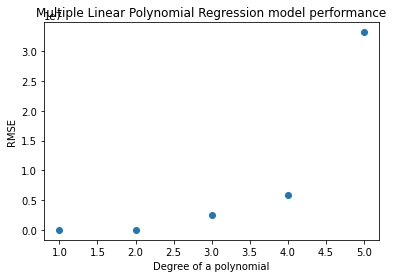

In [47]:
multiple_lin_poly = {}
for i in range(1,6):
    models = train_multiple_lin_poly_regressor(train_numed, important, target="SalePrice", degree=i)
    pd_predictions_vals, rmse_vals = validation(models, test_numed, target="SalePrice") 
    multiple_lin_poly[i] = rmse_vals

key_list = list(multiple_lin_poly.keys())
val_list = list(multiple_lin_poly.values())
val_minimum = min(val_list)
key_minimum = key_list[val_list.index(val_minimum)]
print(f"Minimum RMSE of {val_minimum:.2f} has been achieved at {key_minimum}-degree Multiple Linear Polynomial Regression model.")
plt.scatter(multiple_lin_poly.keys(),multiple_lin_poly.values(),
           color = "tab:blue")
plt.title("Multiple Linear Polynomial Regression model performance")
plt.xlabel("Degree of a polynomial")
plt.ylabel("RMSE");

In [48]:
from sklearn.ensemble import RandomForestRegressor

def train_random_forest_regressor(data,parameters,target="SalePrice",n_estimators=1,random_state=0):
    regressors = {}
    regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    regressor.fit(data[parameters].values, data[target].values)
    
    regressors["regressor"] = regressor
    regressors["parameters"] = parameters

    return regressors
    
#Конец вашего кода
model_rf = train_random_forest_regressor(train_numed, important, target="SalePrice", n_estimators=1)
print(model_rf)

{'regressor': RandomForestRegressor(n_estimators=1, random_state=0), 'parameters': Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_No',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')}


In [49]:
def validation_rf(model,data,target = "SalePrice"):
    pd_val = pd.DataFrame(data, columns = [target])
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    random_forest_features = data[model["parameters"]].values
    pd_val[col_pred] = model["regressor"].predict(random_forest_features).astype(int)
    rmse = (np.mean((data[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val,rmse

pd_predictions_rf, rmse_rf = validation_rf(model_rf, test_numed, target="SalePrice")
print(rmse_rf)
pd_predictions_rf.head()

42949.420345652936


,SalePrice,OverallQual-YearBuilt-YearRemodAdd-MasVnrArea-BsmtFinSF1-TotalBsmtSF-1stFlrSF-GrLivArea-FullBath-TotRmsAbvGrd-Fireplaces-GarageCars-GarageArea-Neighborhood_NridgHt-MasVnrType_None-ExterQual_Ex-ExterQual_Gd-ExterQual_TA-Foundation_PConc-BsmtQual_Ex-BsmtQual_TA-BsmtFinType1_GLQ-HeatingQC_Ex-KitchenQual_Ex-KitchenQual_TA-FireplaceQu_No-GarageFinish_Fin-GarageFinish_Unf-SaleType_New-SaleCondition_Partial
0,214000,173900
1,117500,125000
2,98300,119750
3,210000,159000
4,144500,155900


Minimum RMSE of 24180.58 has been achieved at 15-sized RF model.


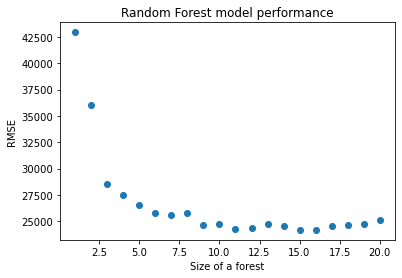

In [53]:
rand_forest = {}
for i in range(1,21):
    models_rf = train_random_forest_regressor(train_numed, important, target="SalePrice", n_estimators=i)
    pd_predictions_vals_rf, rmse_vals_rf = validation_rf(models_rf, test_numed, target="SalePrice") 
    rand_forest[i] = rmse_vals_rf

key_list_rf = list(rand_forest.keys())
val_list_rf = list(rand_forest.values())
val_minimum_rf = min(val_list_rf)
key_minimum_rf = key_list_rf[val_list_rf.index(val_minimum_rf)]
print(f"Minimum RMSE of {val_minimum_rf:.2f} has been achieved at {key_minimum_rf}-sized RF model.")
plt.scatter(rand_forest.keys(),rand_forest.values(),
           color = "tab:blue")
plt.title("Random Forest model performance")
plt.xlabel("Size of a forest")
plt.ylabel("RMSE");

In [54]:
from sklearn.svm import SVR

#Начало вашего кода
def support_vector_regression(data, parameters, target, kernel = "linear", degree = 3, epsilon = 0.1):
    reg_dict = {}
    
    regressor = SVR(kernel = kernel, degree = degree, epsilon = epsilon)
    regressor.fit(data[parameters].values, data[target].values)
    
    reg_dict["regressor"] = regressor
    reg_dict["parameters"] = parameters
    
    return reg_dict
#Конец вашего кода

model_svr = support_vector_regression(train_numed,important,"SalePrice",epsilon=0.1)
print(model_svr)

{'regressor': SVR(kernel='linear'), 'parameters': Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_No',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')}


In [55]:
def validation_svr(model, data,  target = "SalePrice"):    
    pd_val = pd.DataFrame(data, columns = [target])
    
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    
    svr_features = data[model["parameters"]].values
    pd_val[col_pred] = model["regressor"].predict(svr_features).astype(int)
    rmse = (np.mean((pd_val[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val, rmse

pd_predictions_svr, rmse_svr = validation_svr(model_svr, test_numed, target="SalePrice")
print(rmse_svr)
pd_predictions_svr.head()

33096.97619639637


,SalePrice,OverallQual-YearBuilt-YearRemodAdd-MasVnrArea-BsmtFinSF1-TotalBsmtSF-1stFlrSF-GrLivArea-FullBath-TotRmsAbvGrd-Fireplaces-GarageCars-GarageArea-Neighborhood_NridgHt-MasVnrType_None-ExterQual_Ex-ExterQual_Gd-ExterQual_TA-Foundation_PConc-BsmtQual_Ex-BsmtQual_TA-BsmtFinType1_GLQ-HeatingQC_Ex-KitchenQual_Ex-KitchenQual_TA-FireplaceQu_No-GarageFinish_Fin-GarageFinish_Unf-SaleType_New-SaleCondition_Partial
0,214000,224569
1,117500,117346
2,98300,75724
3,210000,145801
4,144500,152052


Minimum RMSE of 50279.73 has been achieved at 13-degree polynomial SVR model.


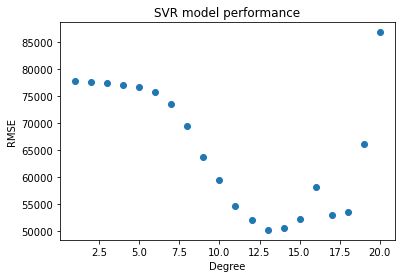

In [60]:
svr_deg = {}
for deg in range(1,21,1):
    models_deg = support_vector_regression(train_numed, important, target="SalePrice", kernel = "poly",degree=deg, epsilon =0.1)
    pd_predictions_vals_deg, rmse_vals_deg = validation_svr(models_deg, test_numed, target="SalePrice") 
    svr_deg[deg] = rmse_vals_deg

key_list_deg = list(svr_deg.keys())
val_list_deg = list(svr_deg.values())
val_minimum_deg = min(val_list_deg)
key_minimum_deg = key_list_deg[val_list_deg.index(val_minimum_deg)]
print(f"Minimum RMSE of {val_minimum_deg:.2f} has been achieved at {key_minimum_deg}-degree polynomial SVR model.")
plt.scatter(svr_deg.keys(),svr_deg.values(),
           color = "tab:blue")
plt.title("SVR model performance")
plt.xlabel("Degree")
plt.ylabel("RMSE");

Minimum RMSE of 77769.31 has been achieved at 0.0-epsiloned SVR model.


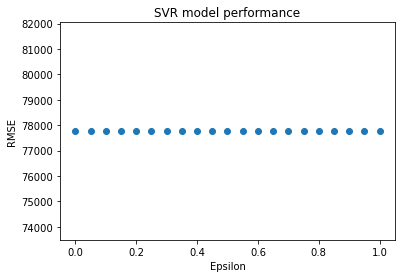

In [62]:
svr_rbf = {}
for eps in np.arange(0,1.05,0.05):
    models_rbf = support_vector_regression(train_numed, important, target="SalePrice", kernel = "rbf", epsilon =eps )
    pd_predictions_vals_rbf, rmse_vals_rbf = validation_svr(models_rbf, test_numed, target="SalePrice") 
    svr_rbf[eps] = rmse_vals_rbf

key_list_rbf = list(svr_rbf.keys())
val_list_rbf = list(svr_rbf.values())
val_minimum_rbf = min(val_list_rbf)
key_minimum_rbf = key_list_rbf[val_list_rbf.index(val_minimum_rbf)]
print(f"Minimum RMSE of {val_minimum_rbf:.2f} has been achieved at {key_minimum_rbf}-epsiloned SVR model.")
plt.scatter(svr_rbf.keys(),svr_rbf.values(),
           color = "tab:blue")
plt.title("SVR model performance")
plt.xlabel("Epsilon")
plt.ylabel("RMSE");

Для того, чтобы выбрать алгоритм машинного обучения я использовал схему
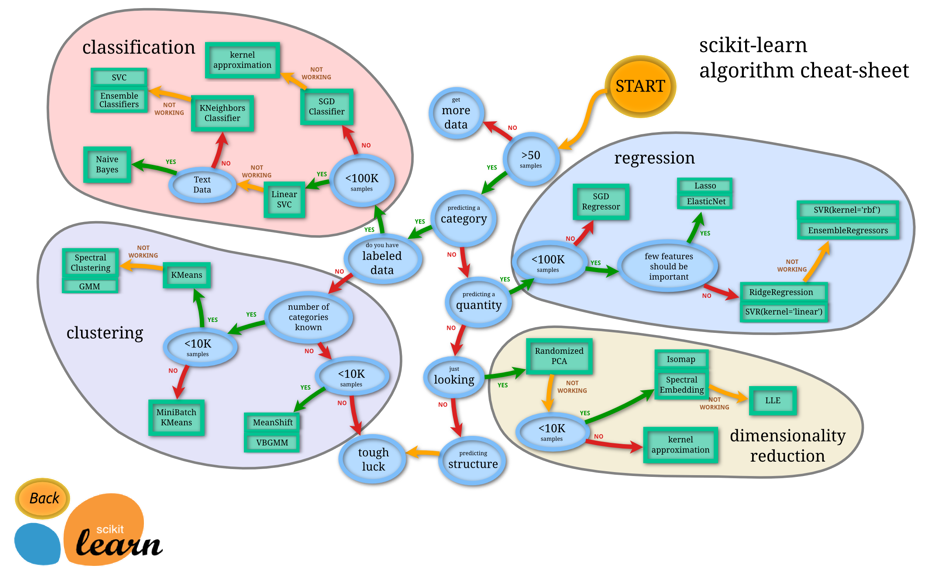


Так как у нас задача регрессии и длина выборки меньше 100 тысяч, а некоторые признаки являются важными, то остановимся на Лассо.  
Этот метод основывается на регрессии методом наименьших квадратов с использованием регуляризации весов признаков, чтобы избежать излишнюю сложность модели или тенденции к переобучаемости.

In [63]:
from sklearn.linear_model import Lasso

def train_Lasso_regressor(data,parameters,target,alpha):
    regressors = {}
    regressor = Lasso(alpha=alpha)
    regressor.fit(data[parameters].values,data[target].values)
    
    regressors["regressor"] = regressor
    regressors["parameters"] = parameters
    
    return regressors

model_Lasso = train_Lasso_regressor(train_numed,important,target="SalePrice",alpha=1)
print(model_Lasso)

{'regressor': Lasso(alpha=1), 'parameters': Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_No',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')}


In [64]:
def validation_Lasso(model,data,target = "SalePrice"):
    pd_val = pd.DataFrame(data, columns = [target])
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    random_forest_features = data[model["parameters"]].values
    pd_val[col_pred] = model["regressor"].predict(random_forest_features).astype(int)
    rmse = (np.mean((data[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val,rmse

pd_predictions_Lasso, rmse_Lasso = validation_Lasso(model_Lasso, test_numed, target="SalePrice")
print(rmse_Lasso)
pd_predictions_Lasso.head()

30610.018001549302


,SalePrice,OverallQual-YearBuilt-YearRemodAdd-MasVnrArea-BsmtFinSF1-TotalBsmtSF-1stFlrSF-GrLivArea-FullBath-TotRmsAbvGrd-Fireplaces-GarageCars-GarageArea-Neighborhood_NridgHt-MasVnrType_None-ExterQual_Ex-ExterQual_Gd-ExterQual_TA-Foundation_PConc-BsmtQual_Ex-BsmtQual_TA-BsmtFinType1_GLQ-HeatingQC_Ex-KitchenQual_Ex-KitchenQual_TA-FireplaceQu_No-GarageFinish_Fin-GarageFinish_Unf-SaleType_New-SaleCondition_Partial
0,214000,214345
1,117500,106747
2,98300,108788
3,210000,157635
4,144500,170384


Minimum RMSE of 29121.69 has been achieved at 890-alpha Lasso model.


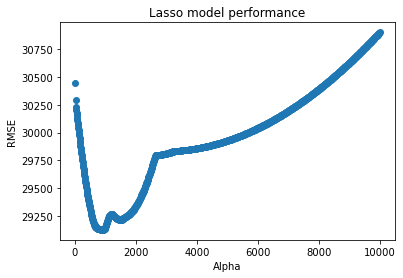

In [65]:
svr_Lasso = {}
for alpha in np.arange(10,10000,10):
    models_Lasso = train_Lasso_regressor(train_numed, important, target="SalePrice", alpha=alpha)
    pd_predictions_vals_Lasso, rmse_vals_Lasso = validation_Lasso(models_Lasso, test_numed, target="SalePrice") 
    svr_Lasso[alpha] = rmse_vals_Lasso

key_list_Lasso = list(svr_Lasso.keys())
val_list_Lasso = list(svr_Lasso.values())
val_minimum_Lasso = min(val_list_Lasso)
key_minimum_Lasso = key_list_Lasso[val_list_Lasso.index(val_minimum_Lasso)]
print(f"Minimum RMSE of {val_minimum_Lasso:.2f} has been achieved at {key_minimum_Lasso}-alpha Lasso model.")
plt.scatter(svr_Lasso.keys(),svr_Lasso.values(),
           color = "tab:blue")
plt.title("Lasso model performance")
plt.xlabel("Alpha")
plt.ylabel("RMSE");

## 3. Сравнение моделей на основе метрик регрессии.

Сравнение по метрикам RMSE мы уже проделали ранее.

In [68]:
print(f"{key_minimum}-degree multiple polynomial linear regression model RMSE: {val_minimum:30.2f}")
print(f"{key_minimum_rf}-sized Random Forest model RMSE: {val_minimum_rf:54.2f}")
print(f"Linear-kernelled 0.1-epsiloned Support Vector Regression model RMSE: {rmse_svr:20.2f}")
print(f"{key_minimum_deg}-degree poly-kernelled 0.1-epsiloned Support Vector Regression model RMSE: {val_minimum_deg:12.2f}")
print(f"RBF-kernelled {key_minimum_rbf}-epsiloned Support Vector Regression model RMSE: {val_minimum_rbf:23.2f}")
print(f"{key_minimum_Lasso}-alpha Lasso model RMSE: {val_minimum_Lasso:61.2f}")

1-degree multiple polynomial linear regression model RMSE:                       30630.50
15-sized Random Forest model RMSE:                                               24180.58
Linear-kernelled 0.1-epsiloned Support Vector Regression model RMSE:             33096.98
13-degree poly-kernelled 0.1-epsiloned Support Vector Regression model RMSE:     50279.73
RBF-kernelled 0.0-epsiloned Support Vector Regression model RMSE:                77769.31
890-alpha Lasso model RMSE:                                                      29121.69


Сравним модели по остальным метрикам: MSE, MAE, R2, adjusted R2.

In [69]:
import sklearn.metrics as metrics

def calc_adjusted_r2(truth,preds,k=1):
    n = len(truth)
    adj_r2 = 1 - (n - 1)*(1-metrics.r2_score(truth,preds))/(n-k-1)
    return adj_r2
pds = []

In [70]:
model_lin =train_multiple_lin_poly_regressor(train_numed, important, target="SalePrice", degree=key_minimum)
pd_predictions_lin, rmse_lin = validation(model_lin, test_numed, target="SalePrice")
pds.append(pd_predictions_lin)

model_rf = train_random_forest_regressor(train_numed, important, target="SalePrice", n_estimators=key_minimum_rf)
pd_predictions_rf, rmse_rf = validation_rf(model_rf, test_numed, target="SalePrice")
pds.append(pd_predictions_rf)

pd_predictions_svr, rmse_svr
pds.append(pd_predictions_svr)

model_deg = support_vector_regression(train_numed, important, target="SalePrice", kernel = "poly", degree =key_minimum_deg, epsilon =0.11 )
pd_predictions_deg, rmse_deg = validation_svr(model_deg, test_numed, target="SalePrice")
pds.append(pd_predictions_deg)

model_rbf = support_vector_regression(train_numed, important, target="SalePrice", kernel = "rbf", epsilon =0.11 )
pd_predictions_rbf, rmse_rbf = validation_svr(model_rbf, test_numed, target="SalePrice")
pds.append(pd_predictions_rbf)

model_Lasso = train_Lasso_regressor(train_numed, important, target="SalePrice", alpha=4900)
pd_predictions_Lasso, rmse_Lasso = validation_Lasso(model_Lasso, test_numed, target="SalePrice")
pds.append(pd_predictions_Lasso)

In [73]:
import pandas as pd

names = ["RMSE","MSE","MAE","R-squared","Adjusted R-squared"]
rmses = [rmse_lin,rmse_rf,rmse_svr,rmse_deg,rmse_rbf,rmse_Lasso]
mses = []
maes=[]
r2=[]
adj_r2=[]
for pd_single in pds:
    mses.append(metrics.mean_squared_error(pd_single.iloc[:,0],pd_single.iloc[:,1]))
    maes.append(metrics.mean_absolute_error(pd_single.iloc[:,0],pd_single.iloc[:,1]))
    r2.append(metrics.r2_score(pd_single.iloc[:,0],pd_single.iloc[:,1]))
    adj_r2.append(calc_adjusted_r2(pd_single.iloc[:,0],pd_single.iloc[:,1],k=10))
columns = ["Linear Regression","Random Forest","Linear SVR","13-degree SVR","RBF SVR","Lasso"]

metrics_pd = pd.DataFrame()
metrics_pd["Metrics"] = names
counter = 0
for col in columns:
    metrics_pd[col] = [rmses[counter],mses[counter],maes[counter],r2[counter],adj_r2[counter]]
    counter = counter + 1    

In [74]:
pd.options.display.float_format = "{:,.2f}".format

metrics_pd

,Metrics,Linear Regression,Random Forest,Linear SVR,13-degree SVR,RBF SVR,Lasso
0,RMSE,"30,630.50","24,180.58","33,096.98","50,279.73","77,769.31","29,918.34"
1,MSE,"938,227,708.26","584,700,338.61","1,095,409,833.34","2,528,051,279.05","6,048,065,097.71","895,106,915.55"
2,MAE,"21,040.81","17,756.84","21,961.80","40,429.35","54,216.23","21,246.14"
3,R-squared,0.84,0.90,0.81,0.56,-0.05,0.84
4,Adjusted R-squared,0.82,0.89,0.80,0.53,-0.13,0.83


Как можем заметить, алгоритм Случайного Леса по всем метрикам лучше остальных моделей. Далее идет Лассо, Линейная Регрессия и Метод Опорных Векторов с линейным ядром. Метод Опорных Векторов с полиномиальным ядром показал плохие результаты, тогда как с rbf-ядром и вовсе хуже с отрицательным показателем коэффициента детерминации R2.